(33600, 784) (8400, 784)
(33600,) (8400,)


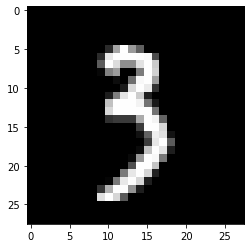

3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
Total params: 47,710
Trainable params: 47,710
Non-trainable params: 0
_________________________________________________________________


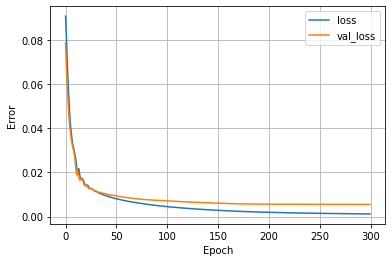

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

dataset = pd.read_csv('../input/mnist-digit-recognizer/train.csv')
# dataset.head()
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
# test_dataset.head()
# print(train_dataset.shape, test_dataset.shape)
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('label')
test_labels = test_features.pop('label')
print(train_features.shape, test_features.shape)
print(train_labels.shape, test_labels.shape)

train_features = np.array(train_features)
test_features = np.array(test_features)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

plt.imshow(train_features[33599][:].reshape((28,28)),cmap='gray')
plt.show()
print(train_labels[33599])
#print(train_features[33599])

train_features = train_features/255
test_features = test_features/255

#print(train_labels)

train_labels = tf.keras.utils.to_categorical(train_labels,dtype='float32')
test_labels = tf.keras.utils.to_categorical(test_labels,dtype='float32')

#print(train_labels[2][:])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(train_features.shape[1],)))
#model.add(tf.keras.layers.Dense(units=10,activation="sigmoid"))
#model.add(tf.keras.layers.Dense(units=10,activation="relu"))
#model.add(tf.keras.layers.Dense(units=20,activation="relu"))
model.add(tf.keras.layers.Dense(units=60,activation="relu"))
#model.add(tf.keras.layers.Dense(units=30,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))
model.summary()

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')
history = model.fit(train_features,train_labels,epochs=300,verbose=0,validation_split=0.1,batch_size=33600)

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0,1.0])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
fig = plt.figure
plot_loss(history)


9 9


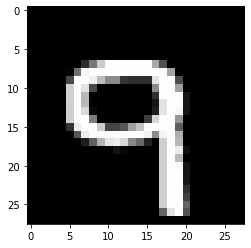

95.76190476190476


In [2]:
pr = model.predict(test_features)
num = 107
print(np.argmax(pr[num]),np.argmax(test_labels[num]))
plt.imshow(test_features[num][:].reshape((28,28)),cmap='gray')
plt.show()

pr = np.rint(pr)
test_labels = np.rint(test_labels)
def findacc(p,t):
    err = 0
    for row in range(t.shape[0]):
        for col in range(t.shape[1]):
            if p[row][col]!=t[row][col]:
                err += 1
                break
    return (t.shape[0]-err)*100/t.shape[0]
print(findacc(pr,test_labels))

